ANALISI DEL DATASET: CLASSIFICAZIONE DELLE STELLE

In [1]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import widgets
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Stars_manipulated.csv")

dataset

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,Red Dwarf
1,3042,0.000500,0.1542,16.60,Red,M,Red Dwarf
2,2600,0.000300,0.1020,18.70,Red,M,Red Dwarf
3,2800,0.000200,0.1600,16.65,Red,M,Red Dwarf
4,1939,0.000138,0.1030,20.06,Red,M,Red Dwarf
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,Hyper Giants
236,30839,834042.000000,1194.0000,-10.63,Blue,O,Hyper Giants
237,8829,537493.000000,1423.0000,-10.73,White,A,Hyper Giants
238,9235,404940.000000,1112.0000,-11.23,White,A,Hyper Giants


Viene stampata una parte del dataset per mostrarne la struttura. Possiamo vedere che all'interno del dataset sono contenute 7 colonne, ciascuna corripondente ad un diverso attributo.

Gli attributi sono rispettivamente:

1. Temperatura del colore, espressa in Kelvin.
2. L, è la luminosità della stella cioè la quantità di energia elettromagnetica che viene emessa dalla stella stessa per unità di tempo, ovvero la sua potenza. Viene espresso in relazione alla luminosità del sole.
3. R, è il raggio della stella. Viene espresso in relazione al raggio del sole.
4. AM, parametro che dipende dalla luminosità intrinseca della stella e dalla sua distanza con la terra.
5. Colore, indica il colore dello spettro della stella. Rispetto al dataset originale sono state raggruppate per colore alcune stelle. Si veda il codice usato per modificare il dataset per i dettagli. 
6. Classe spettrale a cui appartengono le stelle.
7. Tipo di stella, viene assegnata considerando i parametri di colore, spettro di emissione ed albedo. Nel dataset originale viene indicato con un numero, in quello analizzato sono visibili le etichette relative al tipo di stella. Di seguito le etichette col relativo numero:
- 0 Red Dwarf
- 1 Brown Dwarf
- 2 White Dwarf
- 3 Main Sequence
- 4 Super Giants
- 5 Hyper Giants

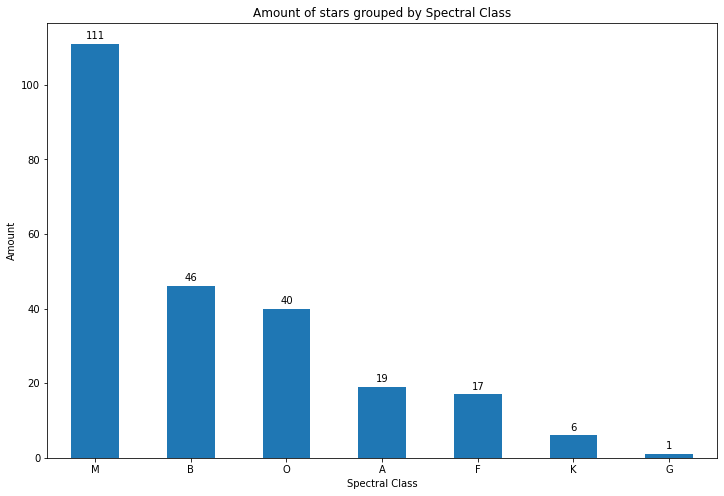

In [3]:
p = dataset['Spectral_Class'].value_counts().plot.bar(title="Amount of stars grouped by Spectral Class", xlabel= "Spectral Class", ylabel= 'Amount',rot=0, figsize=(12,8));

for i in range(len(dataset['Spectral_Class'].value_counts())):
    p.annotate(dataset['Spectral_Class'].value_counts()[i], # this is the text
                 (i,dataset['Spectral_Class'].value_counts()[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center')

Tramite l'utilizzo di un bar chart a questo punto vengono mostrate le proporzioni tra le sette tipologie di classi spettrali. La classe spettrale di una stella si identifica spesso con la sua temperatura. Infatti possiamo classificare le stelle appartenenti alla classe O come quelle più fredde, dall'altra parte invece la classe spettrale M rappresenta gli astri più caldi.
Come abbiamo detto le classi sono sette e si identificano con:

- O 28000 – 50000 K
- B 10000 – 28000 K
- A 7500 – 10000 K
- F 6000 – 7500 K
- G 4900 – 6000 K
- K 3500 – 4900 K
- M < 3500 K

Dal grafico concludiamo che le stelle più calde e le stelle più fredde (da intendersi agli estremi dello spettro) sono quelle prevalenti. Per quanto riguarda invece le stelle nell'intorno più interno allo spettro (quindi le classi A, F, G, K) sono proporzionalmente inferiori.

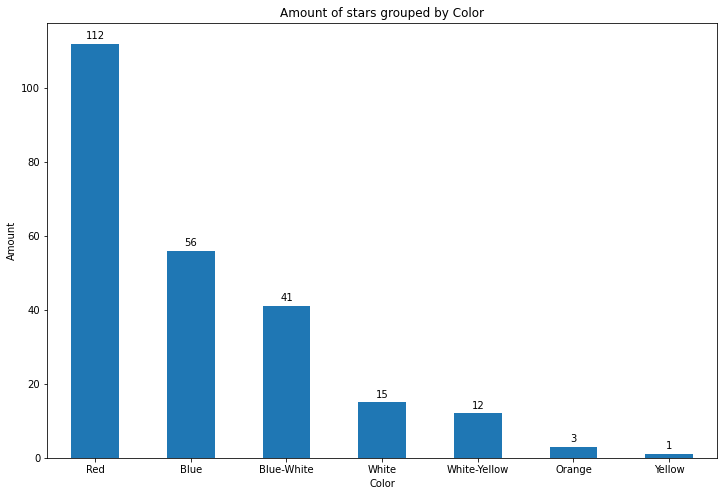

In [4]:
bar = dataset['Color'].value_counts().plot.bar(title="Amount of stars grouped by Color", xlabel= "Color", ylabel= 'Amount',rot=0, figsize=(12,8));

for i in range(len(dataset['Color'].value_counts())):
    bar.annotate(dataset['Color'].value_counts()[i], # this is the text
                 (i,dataset['Color'].value_counts()[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center')


Analogamente al grafico precedente mostriamo la distribuzione delle stelle non più basandoci sulla classe spettrale ma sul colore dell'astro celeste. Come vediamo possiamo suddividere i colori in sette, ciascuno associato ad una classe spettrale:

- O: Blu
- B: Bianco-Blu
- A: Bianco
- F: Bianco-Giallo
- G: Giallo
- K: Arancione
- M: Rosso

Vi è dunque una stretta relazione tra colore e classe spettrale.

In [5]:
scales = alt.selection_interval(bind='scales')

alt.Chart(dataset).mark_point().encode( 
    
    x = alt.X('Temperature',
         scale = alt.Scale(domain = (min(dataset.Temperature), max(dataset.Temperature))),
         axis = alt.Axis(format='K', title='Color Temperature: K')
         ),
    
    y = alt.Y('L',
         scale = alt.Scale(domain = (min(dataset.L), max(dataset.L))),
         axis = alt.Axis(format='K', title='Brightness (L)')
         ),
    
    size = alt.Size('R', legend = alt.Legend(title = 'Dimension (R)'))
    
).add_selection(
    scales
)

alt.Chart(...)

Nel grafico viene rappresentata la temperatura del colore della stella sull'asse delle ascisse, mentre su quello delle ordinate viene rappresentata la luminosità (il parametro L). Per rappresentare la dimensione della stella sono stati utilizzati i dati del raggio. Il raggio è in relazione alla dimensione della stella: maggiore è il raggio e maggiore è la dimensione della bolla. 

Il grafico è stato reso interattivo: è possibile zoommare per poter vedere con maggior dettaglio un punto all'interno del grafico.

Da questo grafico non è possibile ricavare molte informazioni

In [6]:
# applying normalization formula to our numerical data
def normalize_colums(column):
    dataset[column] = (dataset[column] - dataset[column].min()) / (dataset[column].max() - dataset[column].min())

In [7]:
numerical_columns = ['Temperature', 'L', 'R', 'A_M']

for column in numerical_columns:
    normalize_colums(column)

dataset

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,0.029663,2.731275e-09,0.000083,0.876798,Red,M,Red Dwarf
1,0.028980,4.944550e-10,0.000075,0.891807,Red,M,Red Dwarf
2,0.017367,2.590003e-10,0.000048,0.957473,Red,M,Red Dwarf
3,0.022622,1.412729e-10,0.000078,0.893371,Red,M,Red Dwarf
4,0.000000,6.828189e-11,0.000049,1.000000,Red,M,Red Dwarf
...,...,...,...,...,...,...,...
235,0.972150,4.412776e-01,0.695919,0.062226,Blue,O,Hyper Giants
236,0.759307,9.818959e-01,0.612777,0.040338,Blue,O,Hyper Giants
237,0.181025,6.327765e-01,0.730304,0.037211,White,A,Hyper Giants
238,0.191692,4.767253e-01,0.570694,0.021576,White,A,Hyper Giants


Vengono normalizzati i dati Scalari presenti nel dataset e successivamente viene stampata nuovamente l'anteprima del dataset. Da questo momento per i grafici verranno utilizzati i dati normalizzati.

In [8]:
scales = alt.selection_interval(bind='scales')

alt.Chart(dataset).mark_point().encode( 
    
    x = alt.X('Temperature',
         scale = alt.Scale(domain = (min(dataset.Temperature), max(dataset.Temperature))),
         axis = alt.Axis(format='K', title='Color Temperature')
         ),
    
    y = alt.Y('L',
         scale = alt.Scale(domain = (min(dataset.L), max(dataset.L))),
         axis = alt.Axis(format='K', title='Brightness (L)')
         ),
    
    size = alt.Size('R', legend = alt.Legend(title = 'Dimension (R)'))
    
).add_selection(
    scales
)

alt.Chart(...)

Come il precedente grafico del dataset completo, non possiamo ricavare molte informazioni utili: i dati sono distribuiti in tutto l'intervallo. La differenza col grafico precedente è che qui i dati rappresentanti sono normalizzati quindi compresi nell'intervallo 0-1

Vengono ora rappresentati i grafici relativi alle singole classi spettrali considerando luminosità, temperatura, dimensione e tipo di stella

In [9]:
data = dataset[dataset['Spectral_Class'] == 'O']

dom = ['Main Sequence', 'Super Giants', 'Hyper Giants']
rng = ['#0055ff', '#00d5ff', '#d400ff']
    

alt.Chart(data).mark_point().encode( 
    
    x = alt.X('Temperature',
         scale = alt.Scale(domain = (min(data.Temperature), max(data.Temperature))),
         axis = alt.Axis(format='K', title='Color Temperature', grid = False)
         ),
    
    y = alt.Y('L',
         scale = alt.Scale(domain = (min(data.L), max(data.L))),
         axis = alt.Axis(format='K', title='Brightness (L)', grid = False)
         ),
    
    size = alt.Size('R', 
                    scale = alt.Scale(domain = [0, 1]), 
                    legend = alt.Legend(title = 'Dimension (R)')
                   ),
    
    color = alt.Color('Type', scale=alt.Scale(domain=dom, range=rng)
                     )
    
)

alt.Chart(...)

In questo primo grafico possiamo vedere come in questa classe spettrale siano presenti tre tipi diversi di stelle di dimensione, luminosità e temperatura di colore variabile.

Possiamo notare come sia presente un cluster di stelle appartenenti al gruppo Main Sequence nella parte inferiore destra del grafico: sono stelle con una luminosità bassa ma una temperatura elevata. É possibile altresì notare che sono stelle molto piccole.

Sempre nella parte più a destra del grafico, quindi fra le stelle con una temperatura elevata, è possibile trovare le stelle appartenenti al gruppo delle Hyper Giants. Possiamo notare come le stelle appartenenti a questo gruppo siano stelle di dimensioni elevate rispetto alle altre presenti in questa classe spettrale.

Notiamo come le stelle appartenenti alla categoria delle Super Giants siano stelle piccole che hanno prevalentemente una temperatura e una luminosità medio-bassa.


In [10]:
data = dataset[dataset['Spectral_Class'] == 'B']

dom = ['White Dwarf', 'Main Sequence', 'Super Giants', 'Hyper Giants']
rng = ['#029c49', '#0055ff', '#00d5ff', '#d400ff']

alt.Chart(data).mark_point().encode( 
    
    x = alt.X('Temperature',
         scale = alt.Scale(domain = (min(data.Temperature), max(data.Temperature))),
         axis = alt.Axis(format='K', title='Color Temperature', grid = False)
         ),
    
    y = alt.Y('L',
         scale = alt.Scale(domain = (min(data.L), max(data.L))),
         axis = alt.Axis(format='K', title='Brightness (L)', grid = False)
         ),
    
    size = alt.Size('R', 
                    scale = alt.Scale(domain = [0, 1]), 
                    legend = alt.Legend(title = 'Dimension (R)')
                   ),
    
    color = alt.Color('Type', scale=alt.Scale(domain=dom, range=rng)
                     )
    
)

alt.Chart(...)

In questo grafico possiamo vedere come in questa classe spettrale siano presenti quattro tipi diversi di stelle di dimensione, luminosità e temperatura variabile. Bisogna notare come la temperatura di tutte le stelle di questa classe spettrale non sia vicina allo zero e nemmeno vicina all'uno: si pongono nei valori centrali del dataset

Le stelle di dimensione maggiore appartengono al gruppo delle Hyper Giants mentre le stelle delle altre tre categorie sono molto piccole. A tal proprosito è possibile notare come le White Dwarf siano talmente piccole da perdersi nel grafico, le Super Giants sono le stelle che si trovano più a destra del grafico e quindi le più calde mentre le Main Sequence hanno una luminosità bassissima, prossima allo zero. 

In [11]:
data = dataset[dataset['Spectral_Class'] == 'A']

dom = ['White Dwarf', 'Main Sequence', 'Hyper Giants']
rng = ['#029c49', '#0055ff', '#d400ff']

alt.Chart(data).mark_point().encode( 
    
    x = alt.X('Temperature',
         scale = alt.Scale(domain = (min(data.Temperature), max(data.Temperature))),
         axis = alt.Axis(format='K', title='Color Temperature', grid = False)
         ),
    
    y = alt.Y('L',
         scale = alt.Scale(domain = (min(data.L), max(data.L))),
         axis = alt.Axis(format='K', title='Brightness (L)', grid = False)
         ),
    
    size = alt.Size('R', 
                    scale = alt.Scale(domain = [0, 1]), 
                    legend = alt.Legend(title = 'Dimension (R)')
                   ),
    
    color = alt.Color('Type', scale=alt.Scale(domain=dom, range=rng)
                     )
    
)

alt.Chart(...)

In questo grafico possiamo vedere come in questa classe spettrale siano presenti tre tipi diversi di stelle di dimensione, luminosità e temperatura di colore variabile. Bisogna notare come la temperatura di tutte le stelle di questa classe spettrale sia particolarmente bassa.

Le stelle di dimensione maggiore appartengono al gruppo delle Hyper Giants mentre le stelle delle altre categorie sono molto piccole. A tal proprosito è possibile notare come le White Dwarf siano talmente piccole da perdersi nel grafico e le Main Sequence hanno una luminosità bassissima, prossima allo zero.


In [12]:
data = dataset[dataset['Spectral_Class'] == 'F']

dom = ['White Dwarf', 'Main Sequence']
rng = ['#029c49', '#0055ff']

alt.Chart(data).mark_point().encode( 
    
    x = alt.X('Temperature',
         scale = alt.Scale(domain = (min(data.Temperature), max(data.Temperature))),
         axis = alt.Axis(format='K', title='Color Temperature', grid = False)
         ),
    
    y = alt.Y('L',
         scale = alt.Scale(domain = (min(data.L), max(data.L))),
         axis = alt.Axis(format='K', title='Brightness (L)', grid = False)
         ),
    
    size = alt.Size('R', 
                    scale = alt.Scale(domain = [0, 1]), 
                    legend = alt.Legend(title = 'Dimension (R)')
                   ),
    
    color = alt.Color('Type', scale=alt.Scale(domain=dom, range=rng)
                     )
    
)

alt.Chart(...)

In questo grafico possiamo vedere come in questa classe spettrale siano presenti due tipi diversi di stelle tutte di una dimensione molto piccola.

Le stelle di dimensione maggiore appartengono al gruppo delle Main Sequence e vediamo che, pur non essendo particolarmente luminose, sono più luminose delle White Dwarf, la cui luminosità è possima allo zero.

In [13]:
data = dataset[dataset['Spectral_Class'] == 'G']

dom = ['Hyper Giants']
rng = ['#d400ff']

alt.Chart(data).mark_point().encode( 
    
    x = alt.X('Temperature',
         scale = alt.Scale(domain = (min(data.Temperature), max(data.Temperature))),
         axis = alt.Axis(format='K', title='Color Temperature', grid = False)
         ),
    
    y = alt.Y('L',
         scale = alt.Scale(domain = (min(data.L), max(data.L))),
         axis = alt.Axis(format='K', title='Brightness (L)', grid = False)
         ),
    
    size = alt.Size('R', 
                    scale = alt.Scale(domain = [0, 1]), 
                    legend = alt.Legend(title = 'Dimension (R)')
                   ),
    
    color = alt.Color('Type', scale=alt.Scale(domain=dom, range=rng)
                     )
    
)

alt.Chart(...)

A questa classe spettrale appertiene una sola stella: non è possibile ricavare dati esaustivi.

In [14]:
data = dataset[dataset['Spectral_Class'] == 'K']

dom = ['Main Sequence', 'Hyper Giants']
rng = ['#0055ff', '#d400ff']

alt.Chart(data).mark_point().encode( 
    
    x = alt.X('Temperature',
         scale = alt.Scale(domain = (min(data.Temperature), max(data.Temperature))),
         axis = alt.Axis(format='K', title='Color Temperature', grid = False)
         ),
    
    y = alt.Y('L',
         scale = alt.Scale(domain = (min(data.L), max(data.L))),
         axis = alt.Axis(format='K', title='Brightness (L)', grid = False)
         ),
    
    size = alt.Size('R', 
                    scale = alt.Scale(domain = [0, 1]), 
                    legend = alt.Legend(title = 'Dimension (R)')
                   ),
    
    color = alt.Color('Type', scale=alt.Scale(domain=dom, range=rng)
                     )
    
)

alt.Chart(...)

In questo grafico possiamo vedere come in questa classe spettrale siano presenti due tipi diversi di stella.

Le stelle del tipo Hyper Giants sono più grandi e più luminose delle Main Sequence.

In [15]:
data = dataset[dataset['Spectral_Class'] == 'M']

dom = ['Red Dwarf', 'Brown Dwarf', 'Super Giants', 'Hyper Giants']
rng = ['#fc0000', '#874701', '#00d5ff', '#d400ff']

alt.Chart(data).mark_point().encode( 
    
    x = alt.X('Temperature',
         scale = alt.Scale(domain = (min(data.Temperature), max(data.Temperature))),
         axis = alt.Axis(format='K', title='Color Temperature', grid = False)
         ),
    
    y = alt.Y('L',
         scale = alt.Scale(domain = (min(data.L), max(data.L))),
         axis = alt.Axis(format='K', title='Brightness (L)', grid = False)
         ),
    
    size = alt.Size('R', 
                    scale = alt.Scale(domain = [0, 1]), 
                    legend = alt.Legend(title = 'Dimension (R)')
                   ),
    
    color = alt.Color('Type', scale=alt.Scale(domain=dom, range=rng)
                     )
    
)

alt.Chart(...)

In questo grafico possiamo vedere come in questa classe spettrale siano presenti quattro tipi diversi di stelle, differenti per dimensione, luminosità e temperatura di colore.

Notiamo che le stelle di dimensione maggiore sono quelle del tipo Hyper Giants che, pur avendo una temperatura bassa rispetto alla totalità delle stelle, sono quelle con colore più freddo della classe spettrale.

Notiamo che sovrapposte per temperatura e luminosità alle Hyper Giants abbiamo le stelle appartenenti al tipo Super Giants.

Con una luminosità prossima allo zero abbiamo le stelle appartenenti alle classi Red Dwarf e Brown Dwarf che, vista la loro dimensione davvero piccola, quasi si perdono all'interno del grafico.

In [16]:
categorical_dimensions = ['Type', 'Color', 'Spectral_Class']

dimensions = [dict(values=dataset[label], label=label) for label in categorical_dimensions]

# Build colorscale
color = np.zeros(len(dataset), dtype='uint8')
colorscale = [[0, 'gray'], [1, 'firebrick']]

# Build figure containing a scatterplot and a parallel diagram
fig = go.FigureWidget(
    data=[go.Scatter(x=dataset.Temperature, y=dataset['L'],
    marker={'color': 'gray'}, mode='markers', selected={'marker': {'color': 'firebrick'}},
    unselected={'marker': {'opacity': 0.3}}), go.Parcats(
        domain={'y': [0, 0.4]}, dimensions=dimensions,
        line={'colorscale': colorscale, 'cmin': 0,
              'cmax': 1, 'color': color, 'shape': 'hspline'})
    ])

fig.update_layout(
        height=800,
        xaxis={'title': 'Color Temperature'},
        yaxis={'title': 'Brightness', 'domain': [0.6, 1]},
        dragmode='lasso', hovermode='closest')

# Update color callback
def update_color(trace, points, state):
    # Update scatter selection
    fig.data[0].selectedpoints = points.point_inds

    # Update parcats colors
    new_color = np.zeros(len(dataset), dtype='uint8')
    new_color[points.point_inds] = 1
    fig.data[1].line.color = new_color

fig.data[0].on_selection(update_color)
fig.data[1].on_click(update_color)

fig

FigureWidget({
    'data': [{'marker': {'color': 'gray'},
              'mode': 'markers',
              'sele…

Questa metodologia di rappresentazione di dati, chiamata Parallelal Categories Diagram, è molto interessante e funzionale per mettere in relazione diversi dati. Il principale scopo di questo grafico è quello di analizzare la distribuzione dei dati nel dataset di riferimento. Questo rappresentazione tuttavia accetta solamente dati ti tipo categorico e non numerico, infatti nel nostro caso abbiamo focalizzato la ricerda su tre dati quali il Tipo di stella, il suo Colore e la sua Classe Spettrale.
Da qui possiamo approfondire le relazioni che abbiamo constatato precedentemente relative alla connessione tra classe spettrale e colore.

Il Parallelal Categories Diagram in questo caso ci è molto utile inoltre per evidenziare la distribuzione dei colori, delle classi spettrali e del tipo di stella, infatti ponendo l'attenzione su ogni singola categoria possiamo (tramite i flussi colorati) andare ad isolare una tipologia di stella, un colore o una classe spettrale e così abbiamo la possibilità di analizzare la sua distrubuzione nelle altre varie categorie.

Lo Scatter Plot ad esso associato è molto utile per evidenziare la posizione dei dati del Parallelal Categories in base ai parametri che scegliamo noi: in questo caso mettiamo in relazione la luminosità alla temperatura.

In [17]:

# Build figure containing a scatterplot and a parallel diagram
second_fig = go.FigureWidget(
    data=[go.Scatter(x=dataset['A_M'], y=dataset['R'],
    marker={'color': 'gray'}, mode='markers', selected={'marker': {'color': 'firebrick'}},
    unselected={'marker': {'opacity': 0.3}}), go.Parcats(
        domain={'y': [0, 0.4]}, dimensions=dimensions,
        line={'colorscale': colorscale, 'cmin': 0,
              'cmax': 1, 'color': color, 'shape': 'hspline'})
    ])

second_fig.update_layout(
        height=800,
        xaxis={'title': 'Absolute Magnitude'},
        yaxis={'title': 'Radius', 'domain': [0.6, 1]},
        dragmode='lasso', hovermode='closest')

# Update color callback
def second_update_color(trace, points, state):
    # Update scatter selection
    second_fig.data[0].selectedpoints = points.point_inds

    # Update parcats colors
    new_color = np.zeros(len(dataset), dtype='uint8')
    new_color[points.point_inds] = 1
    second_fig.data[1].line.color = new_color

second_fig.data[0].on_selection(second_update_color)
second_fig.data[1].on_click(second_update_color)

second_fig

FigureWidget({
    'data': [{'marker': {'color': 'gray'},
              'mode': 'markers',
              'sele…

Analogamente al grafico precedente si vuole analizzare la distribuzione dei dati tramite il Parallelal Diagram, ma in questo caso nello Scatter Plot andiamo a mettere in relazione due parametri diversi quali la magnitudine assoluta e il raggio.

In [18]:

# Build colorscale
color = np.zeros(len(dataset), dtype='uint8')
colorscale = [[0, 'gray'], [1, 'firebrick']]

# Build figure containing a scatterplot and a parallel diagram
third_fig = go.FigureWidget(
    data=[go.Scatter(x=dataset['A_M'], y=dataset['L'],
    marker={'color': 'gray'}, mode='markers', selected={'marker': {'color': 'firebrick'}},
    unselected={'marker': {'opacity': 0.3}}), go.Parcats(
        domain={'y': [0, 0.4]}, dimensions=dimensions,
        line={'colorscale': colorscale, 'cmin': 0,
              'cmax': 1, 'color': color, 'shape': 'hspline'})
    ])

third_fig.update_layout(
        height=800,
        xaxis={'title': 'Absolute Magnitude'},
        yaxis={'title': 'Brightness', 'domain': [0.6, 1]},
        dragmode='lasso', hovermode='closest')

# Update color callback
def third_update_color(trace, points, state):
    # Update scatter selection
    third_fig.data[0].selectedpoints = points.point_inds

    # Update parcats colors
    new_color = np.zeros(len(dataset), dtype='uint8')
    new_color[points.point_inds] = 1
    third_fig.data[1].line.color = new_color

third_fig.data[0].on_selection(third_update_color)
third_fig.data[1].on_click(third_update_color)

third_fig

FigureWidget({
    'data': [{'marker': {'color': 'gray'},
              'mode': 'markers',
              'sele…

Come in precedenza si vuole analizzare la distribuzione dei dati tramite il Parallelal Diagram, ma in questo caso nello Scatter Plot andiamo a mettere in relazione due parametri diversi quali la magnitudine assoluta e la luminosità.

Questa tipologia di associazione di grafici ci è stata molto utile per trarre conclusioni sulle proprietà delle varie tipologie di stelle, come per esempio distribuzione del colore, della classe spettrale e della propria luminosità, raggio e magnitudine assoluta.

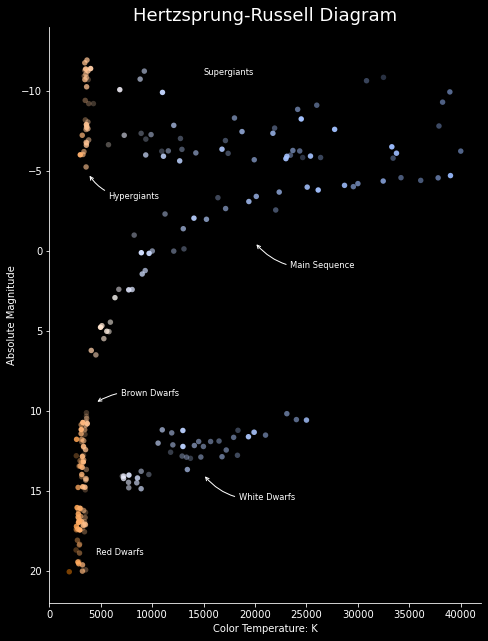

In [19]:
# cannot use this plot with normalized data
df = pd.read_csv("Stars_manipulated.csv")

# hard coded function to map temperature to rbga encoding in the range [0,1]
def temp2rgb(t):
    r,g,b = 0,0,0

    temp = t / 100

    #red
    if temp <= 66: r = 255
    else:
        r = temp - 60
        r = 329.698727446 * (r ** -0.1332047592)
        if r < 0: r = 0
        if r > 255: r = 255
    
    #green
    if temp <= 66: 
        g = temp
        g = 99.4708025861 * np.log(g) - 161.1195681661
        if g < 0: g = 0
        if g > 255: g = 255
    else:
        g = temp - 60
        g = 288.1221695283 * (g ** -0.0755148492)
        if g < 0: g = 0
        if g > 255: g = 255
    
    #blue
    if temp >= 66: b = 255
    else:
        if temp <= 19: b = 0
        else:
            b = temp -10
            b = 138.5177312231 * np.log(b) - 305.0447927307
            if b < 0: g = 0
            if b > 255: g = 255

    return [r/255, g/255, b/255, np.random.uniform(low=0.25, high=1)]

color = df['Temperature'].apply(temp2rgb)

with plt.style.context('dark_background'):
    hrd = plt.figure(
        figsize=(6, 8),
        facecolor='black',
        dpi=72)

    ax = hrd.add_axes([0, 0, 1, 1])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.set_title('Hertzsprung-Russell Diagram', fontsize=18, color='white')

    ax.title.set_position([.5, 1.03])
    ax.set_xlabel('Color Temperature: K', color='white')
    ax.set_ylabel('Absolute Magnitude', color='white')
    ax.tick_params(colors='white')

    ax.set_ylim(22, -14)
    ax.set_xlim(0, 42000)

    #star type annotations
    ax.annotate(
        'Main Sequence', xy=(20000, -0.5), xycoords='data',
        fontsize='small', color='white',
        xytext=(35, -25),
        textcoords='offset points',
        arrowprops=dict(
            arrowstyle="->",
            connectionstyle="arc3,rad=-0.3",
            color='white'))
    ax.annotate(
        'Supergiants', xy=(15000, -11), xycoords='data',
        fontsize='small', color='white')
    ax.annotate(
        'Hypergiants', xy=(3800, -4.8), xycoords='data',
        fontsize='small', color='white',xytext=(20, -25),
        textcoords='offset points',
        arrowprops=dict(
            arrowstyle="->",
            connectionstyle="arc3,rad=-0.3",
            color='white'))
    ax.annotate(
        'Brown Dwarfs', xy=(4500, 9.5), xycoords='data',
        fontsize='small', color='white',
        xytext=(25, 7), textcoords='offset points',
        arrowprops=dict(
            arrowstyle="->",
            connectionstyle="arc3,rad=.2",
            color='white'))
    ax.annotate(
        'Red Dwarfs', xy=(4500, 19), xycoords='data',
        fontsize='small', color='white')
    ax.annotate(
        'White Dwarfs', xy=(15000, 14), xycoords='data',
        fontsize='small', color='white', xytext=(35, -25),
        textcoords='offset points',
        arrowprops=dict(
            arrowstyle="->",
            connectionstyle="arc3,rad=-0.3",
            color='white'))

    #plot main result
    ax.scatter(
        df['Temperature'],
        df['A_M'],
        marker='.',
        s=[120] * len(df),
        facecolors=color,
        linewidth=0);



Questo grafico è chiamato Hertzsprung-Russell Diagram ed è usato molto spesso in astronomia per la classificazione degli astri celesti. É un grafico molto comodo perchè gli astronomi grazie a questo grafico su 4 assi riescono a classificare in modo esaustivo le varie tipologie di stelle.

Nel nostro caso il grafico contiene due assi quali la magnitudine assoluta e la temperatura. La parte interessante del grafico è il colore. Infatti siamo andati a mappare la temperatura della stella in una codifica rgba che è il colore che viene poi visualizzato nel grafico per ogni stella.

Siamo infine andati ad aggiungere delle etichette sul grafico in modo tale da isolare le varie tipologie di stelle.